In [1]:
library(tidyverse)
library(magrittr)
library(ggrepel)
library(readxl)

── Attaching packages ─────────────────────────────────────── tidyverse 1.2.1 ──
✔ ggplot2 3.1.0     ✔ purrr   0.2.5
✔ tibble  1.4.2     ✔ dplyr   0.7.8
✔ tidyr   0.8.2     ✔ stringr 1.3.1
✔ readr   1.1.1     ✔ forcats 0.3.0
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter()  masks stats::filter()
✖ purrr::flatten() masks jsonlite::flatten()
✖ dplyr::lag()     masks stats::lag()

Attaching package: ‘magrittr’

The following object is masked from ‘package:purrr’:

    set_names

The following object is masked from ‘package:tidyr’:

    extract



In [2]:
drivers <- read_xlsx('../../miallma/data/CancerGenes_Pediatric_Adult.xlsx')$Gene

snp2gene <- read_tsv('/Users/hclimente/projects/genewa/data/snp2gene/snp2hgnc.tsv', 
                     col_types = 'cc') %>%
    mutate(cancer_gene = symbol %in% drivers)
map <- read_tsv('/Users/hclimente/data/genesis/genesis.final.map',
                      col_names = F, col_types = 'icii') %>%
    set_colnames(c('chr', 'snp', 'cm', 'pos'))
hl_snps <- read_tsv('../results/gwas/brca_C=50_SELECT=50_M=3_B=5.txt', 
                 col_names = F, col_types = 'c') %>%
    set_colnames('snp') %>%
    mutate(rank = seq(1, n()) ) %>%
    left_join(snp2gene, by = 'snp') %>%
    left_join(map, by = 'snp')

In [3]:
hl_snps

snp,rank,symbol,cancer_gene,chr,cm,pos
rs818449,1,SYNE1,FALSE,6,0,152888942
rs1865185,2,ARAP2,FALSE,4,0,35979627
rs12961011,3,NA,NA,18,0,35818059
rs563231,4,AQP4-AS1,FALSE,18,0,24320999
rs962641,5,RNF217-AS1,FALSE,6,0,125255208
rs4099181,6,APC,TRUE,5,0,112091704
rs599322,7,AKAIN1,FALSE,18,0,5148001
rs4471024,8,NA,NA,8,0,42032131
rs160277,9,VCAN,FALSE,5,0,82837631
rs160277,9,VCAN-AS1,FALSE,5,0,82837631


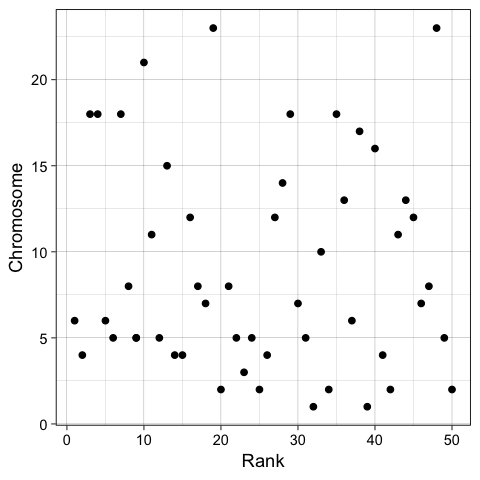

In [4]:
options(repr.plot.width=4, repr.plot.height=4)
ggplot(hl_snps, aes(x = rank, y = chr)) +
    geom_point() +
    labs(x = 'Rank', y = 'Chromosome') +
    theme_linedraw()

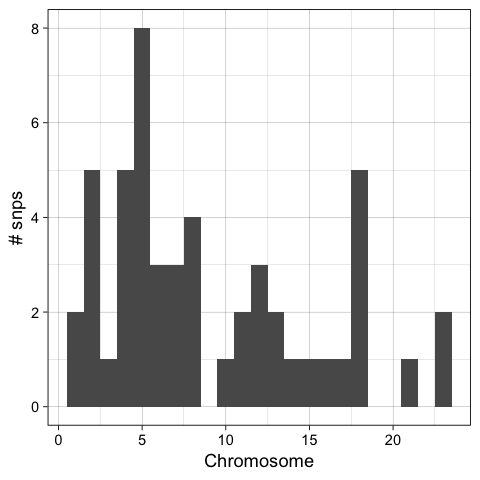

In [5]:
ggplot(hl_snps, aes(chr)) + 
    geom_histogram(bins = 23) +
    theme_linedraw() +
    labs(x = 'Chromosome', y = '# snps')

In [6]:
gwas <- read_tsv('../../genewa/results/genesis/cones.evo.chi2.consistency.additive.gs.6082272.tsv',
                col_types = 'ciiiccdlc') %>%
    mutate(p = pchisq(c, df = 1, lower.tail = FALSE),
           selected = ifelse(snp %in% hl_snps$snp, 'Yes', 'No')) %>%
    arrange(selected)

don <- gwas %>% 
  
  # Compute chromosome size
  group_by(chr) %>% 
  summarise(chr_len=max(pos)) %>% 
  
  # Calculate cumulative position of each chromosome
  mutate(tot=cumsum(chr_len)-chr_len) %>%
  select(-chr_len) %>%
  
  # Add this info to the initial dataset
  left_join(gwas, ., by='chr') %>%
  
  # Add a cumulative position of each SNP
  arrange(chr, pos) %>%
  mutate( BPcum=pos+tot) %>%
  left_join(arrange(snp2gene, symbol, cancer_gene) %>% group_by(snp) %>% summarize(symbol = head(symbol, 1)), by = 'snp') %>%
  mutate(cancer_gene = symbol %in% drivers)

axisdf = don %>% group_by(chr) %>% summarize(center=( max(BPcum) + min(BPcum) ) / 2 )

Warning message:
“Removed 23 rows containing missing values (geom_text_repel).”

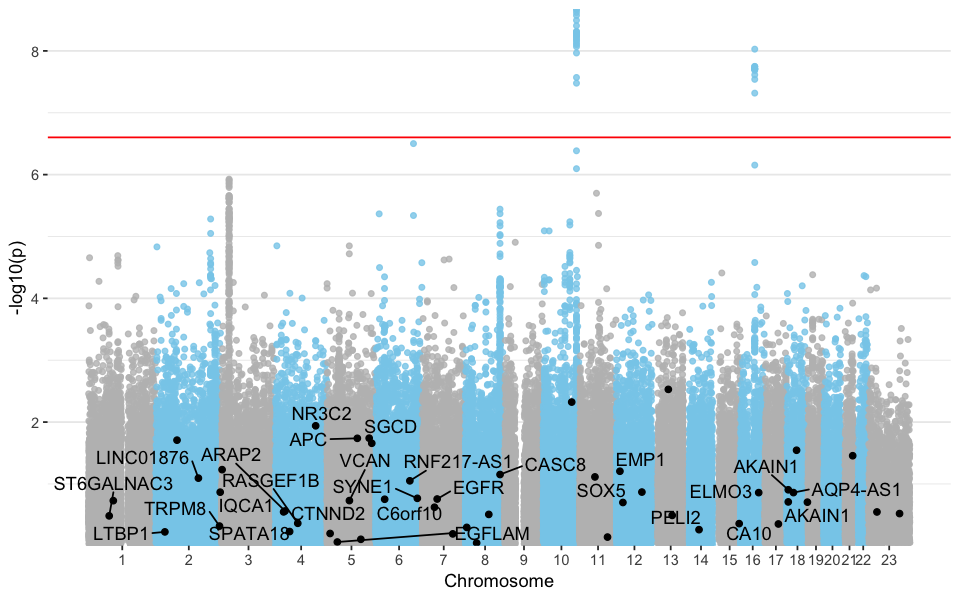

In [7]:
options(repr.plot.width=8, repr.plot.height=5)
ggplot(don, aes(x=BPcum, y=-log10(p))) +
    
    # Show all points
    geom_point( aes(color=as.factor(chr)), alpha=0.8, size=1.3) +
    geom_point(data = filter(don, selected == 'Yes'), aes(x=BPcum, y=-log10(p)), color = 'black') +
    geom_text_repel(data = filter(don, selected == 'Yes'), aes(x=BPcum, y=-log10(p), label = symbol)) +
    scale_color_manual(values = rep(c("grey", "skyblue"), 22 )) +

    # Add Bonferroni line
    geom_hline(yintercept = -log10(.05/200000), color = 'red') +
    
    # custom X axis:
    scale_x_continuous( label = axisdf$chr, breaks= axisdf$center ) +
    scale_y_continuous(expand = c(0, 0) ) +     # remove space between plot area and x axis
  
    # Custom the theme:
    theme_bw() +
    theme( 
      legend.position="none",
      panel.border = element_blank(),
      panel.grid.major.x = element_blank(),
      panel.grid.minor.x = element_blank()
    ) +
    labs(x = 'Chromosome')